In [2]:
import torch
from sae_lens import SAE
from transformer_lens import HookedTransformer
from datasets import load_dataset

/Users/itsukikuwahara/codes/research/sae/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
if torch.backends.mps.is_available():
    device = "mps"
    print("Using MPS device")
else:
    device = "cpu"
    print("Using CPU device")

# 利用する言語モデルをロード
model = HookedTransformer.from_pretrained("gpt2-small", device=device)

# pretrained_saeをロード
sae, cfg_dict, sparsity = SAE.from_pretrained(
    release = "gpt2-small-res-jb",
    sae_id = "blocks.8.hook_resid_pre",
    device = device
)

Using MPS device
Loaded pretrained model gpt2-small into HookedTransformer


/Users/itsukikuwahara/codes/research/sae/.venv/lib/python3.12/site-packages/sae_lens/sae.py:151: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


In [4]:
from saelens import analyze_conversation_wit_sae,visualaize_feature_activations, plot_sparsity_analysis, interactive_feature_explorer, reconstruction_quality_analysis

In [5]:
texts = """
A: Hello! How are you doing today?
B: I'm doing well, thank you! How about you?
A: Great! I wanted to ask you about the meeting tomorrow.
B: Sure, what would you like to know?
"""

In [6]:
print("analyzing texts with SAE")
sae_dict = analyze_conversation_wit_sae(texts, model, sae)

analyzing texts with SAE


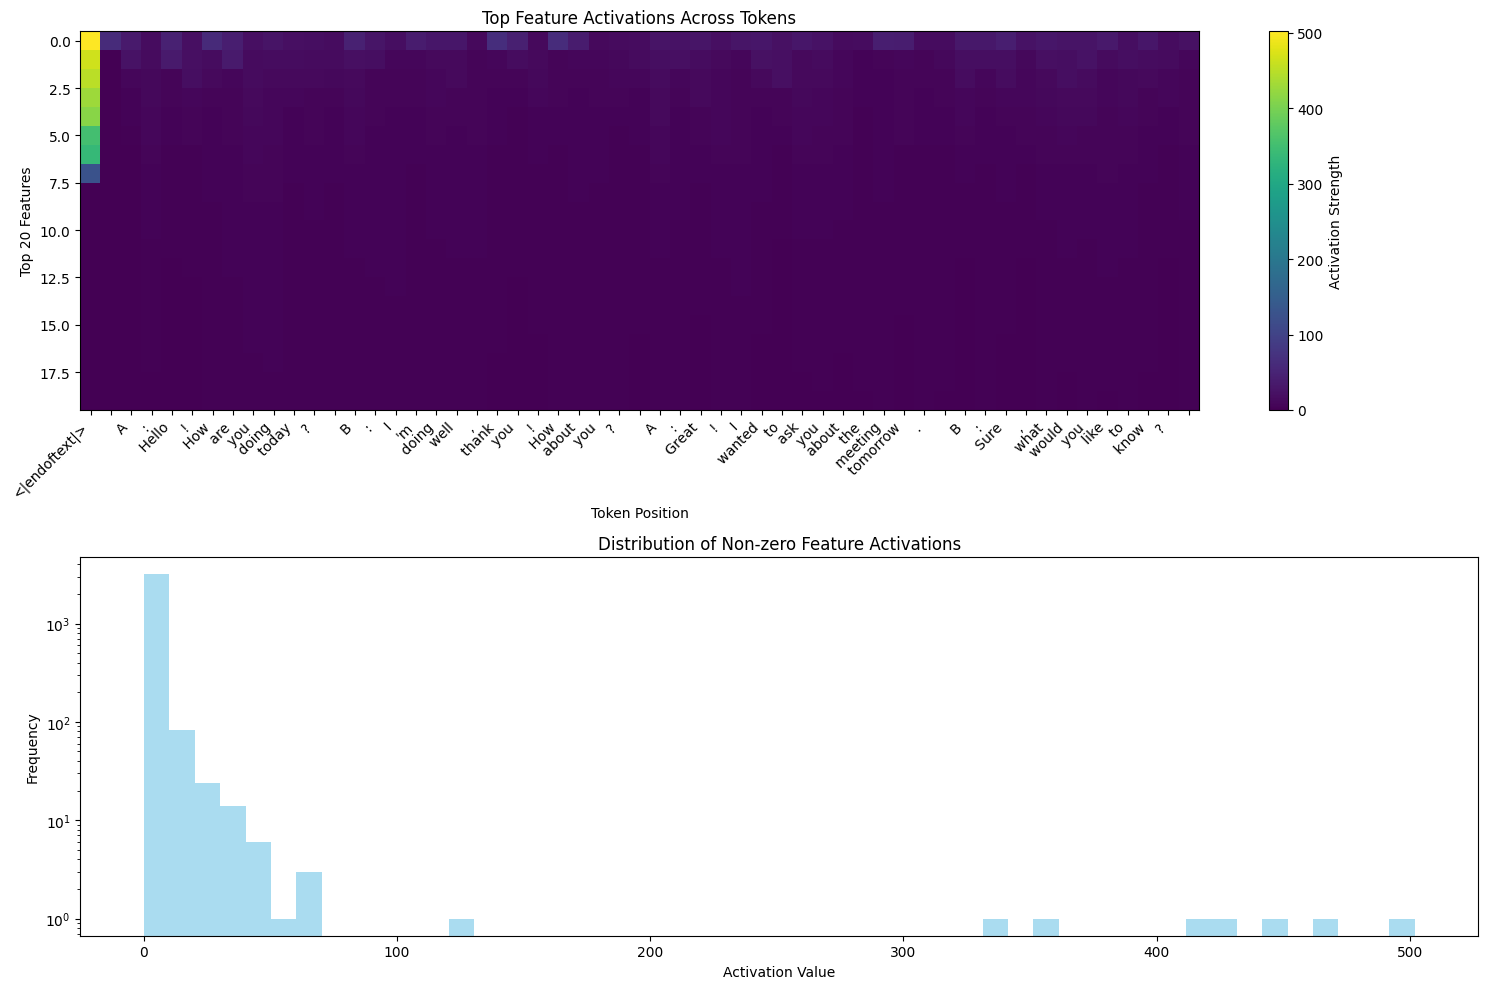

In [7]:
visualaize_feature_activations(sae_dict["feature_acts"], sae_dict["tokens"], model)

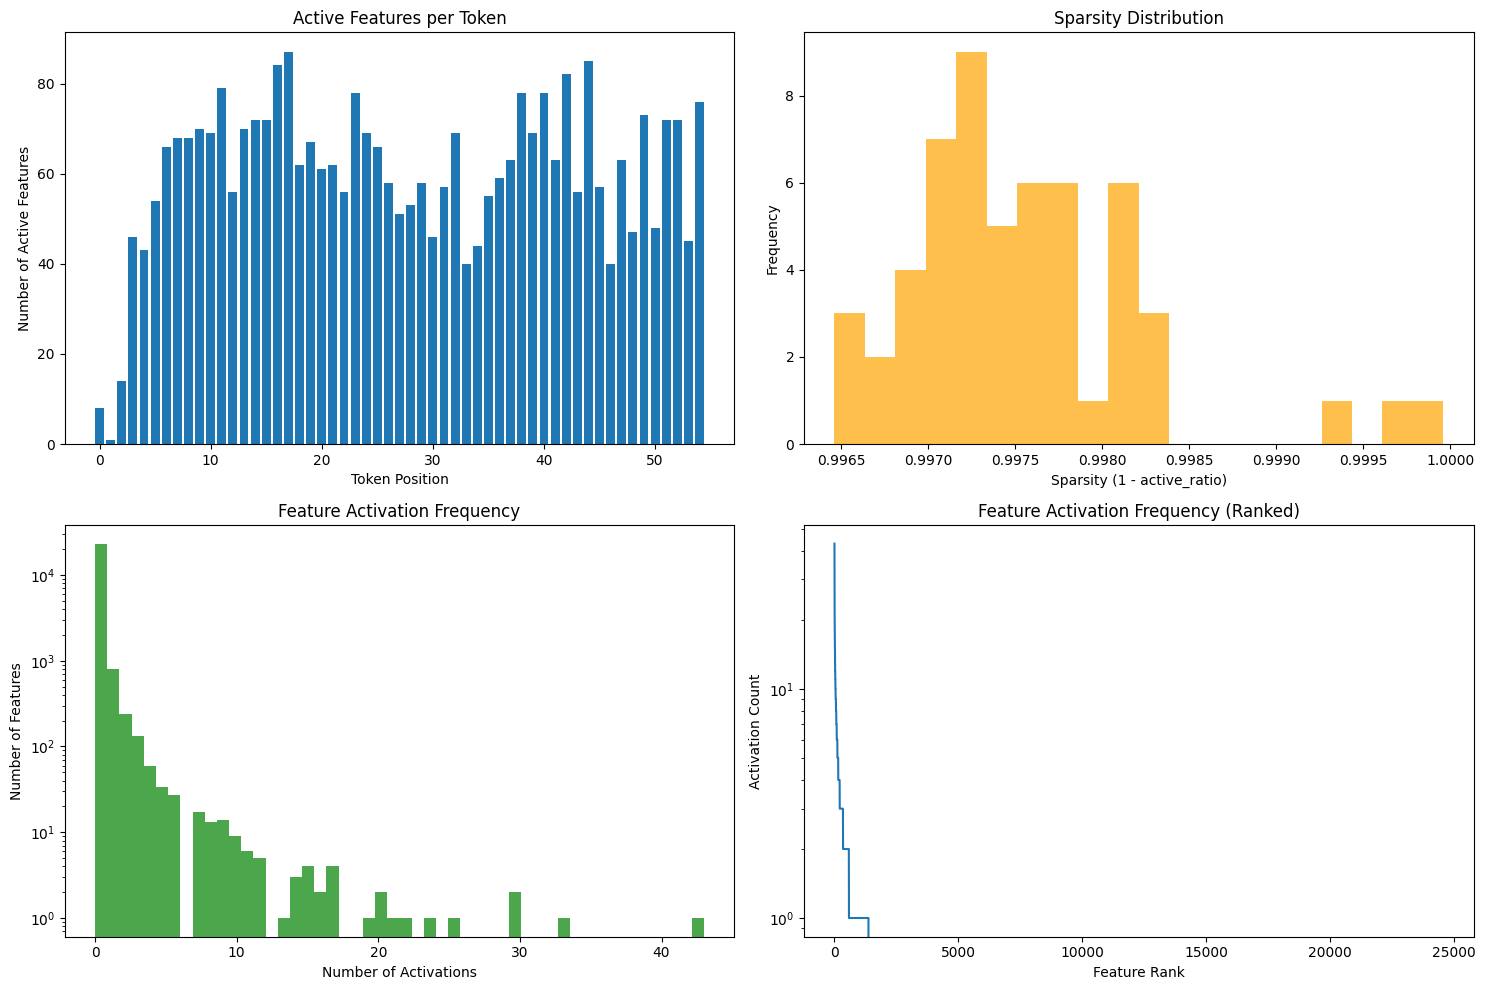

In [8]:
plot_sparsity_analysis(sae_dict["feature_acts"])

In [9]:
interactive_feature_explorer(sae_dict, model)

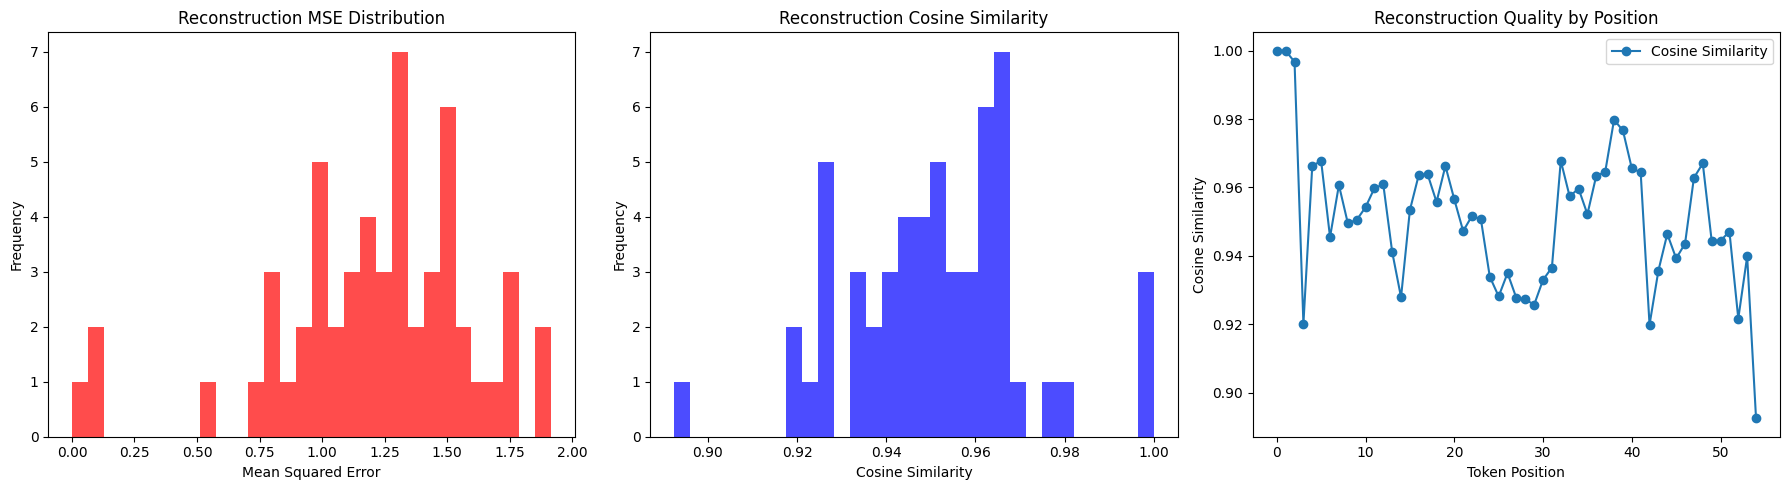

Average MSE: 1.203707
Average Cosine Similarity: 0.9512


In [10]:
reconstruction_quality_analysis(sae_dict)